## Model the output variable "concrete compressive strength" as a linear combination of 1 or 2 important features.

**A** : Plot Y against each of the 8 features seperately

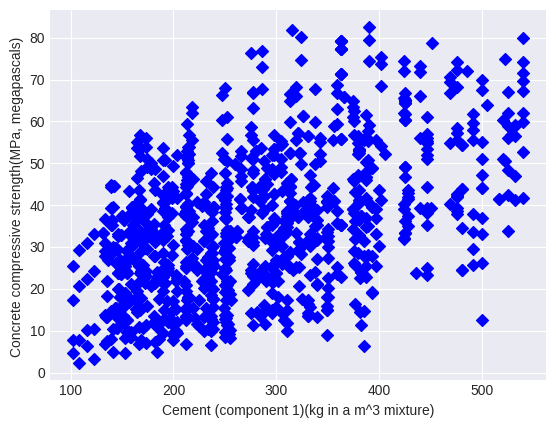

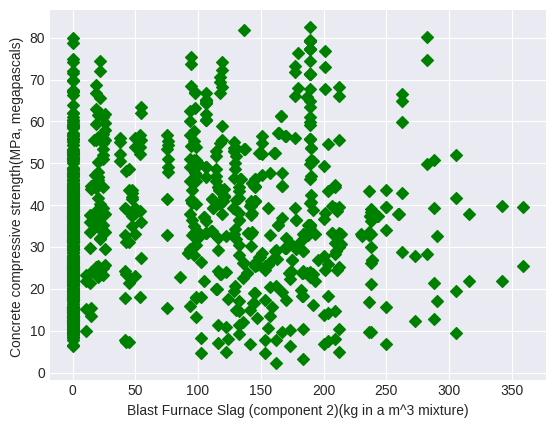

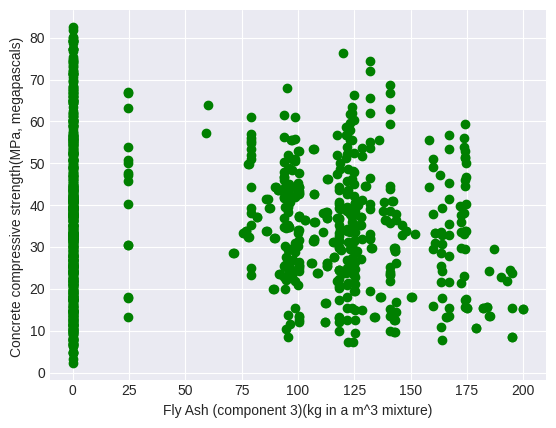

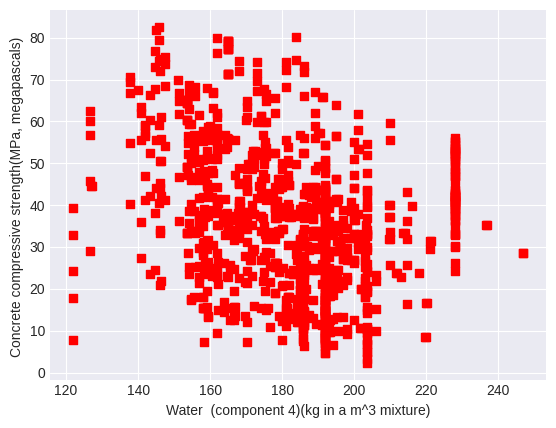

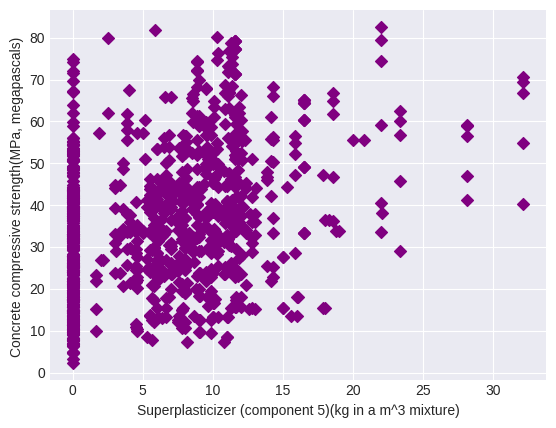

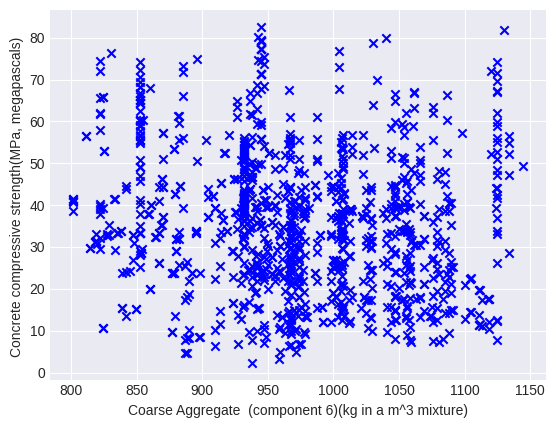

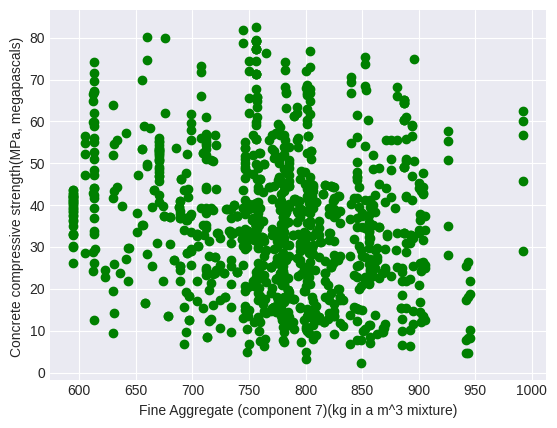

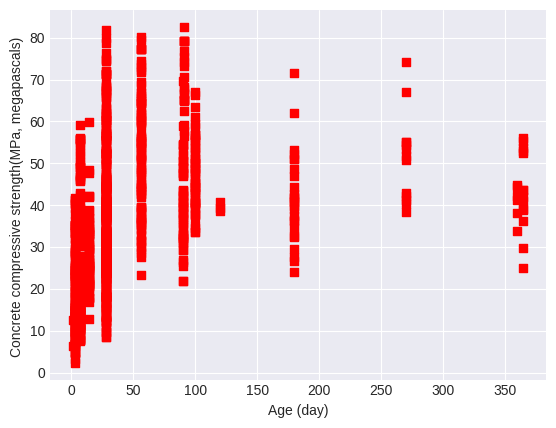

In [38]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("error",RuntimeWarning)

markers = ['^', 'o', 's', 'D', 'x']
colors = ['red', 'blue', 'green', 'orange', 'purple']
df = pd.read_csv("./Concrete_Data.csv")
data = df.to_numpy()
features = df.columns[:-1]
plt.style.use('seaborn-v0_8-darkgrid')
feature_num = 6
test_w = []
test_b = []
# print y vs 8 other features seperately

def print_with_features():

    y_label = df.columns[-1]
    y_data = data[:,-1]
    n = len(features)

    for i in range(n):
        x_data = data[:,i]
        color = np.random.choice(colors)  
        marker = np.random.choice(markers)
        plt.scatter(x_data, y_data, c=color, marker=marker)
        plt.xlabel(features[i])
        plt.ylabel(y_label)
        plt.show()

print_with_features()



**B** : Formulate Cost Function

In [39]:
# cost function

def compute_cost(x,y,w,b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        predict_y = w*x[i] + b
        error = predict_y - y[i]
        cost+=(error**2)

    return (cost/(2*m))

**C** : Use Gradient Descent to optimize the cost (loss) function. Try with various learning rates of 0.1, 0.01, 0.001, 0.0001 and 0.00001 

**E** : Plot the training curve

alpha = 0.1 doesn't give linear regression properly

alpha = 0.01 doesn't give linear regression properly

alpha = 0.001 doesn't give linear regression properly

alpha = 0.0001 doesn't give linear regression properly

alpha = 1e-05 doesn't give linear regression properly

alpha = 1e-06
w = 5 , b = 50
w1 = -0.018648626091942056 b1 = 49.99399195629861 cost=138.36896709427592


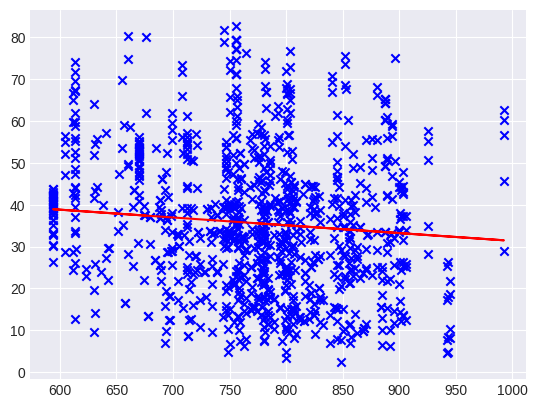


alpha = 1e-06
w = 10 , b = 60
w1 = -0.03142153476021566 b1 = 59.987261348457814 cost=137.55358099178505


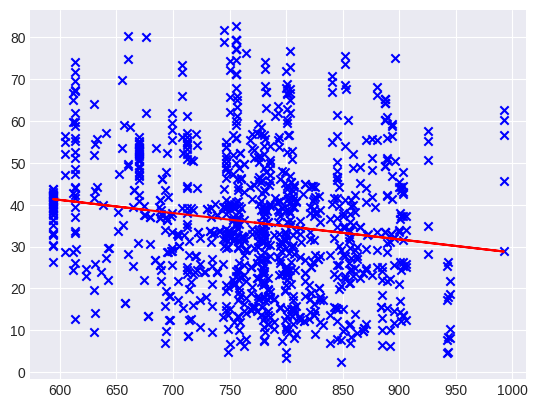


alpha = 1e-06
w = 15 , b = 70
w1 = -0.04419444342848915 b1 = 69.98053074061693 cost=137.81587303541934


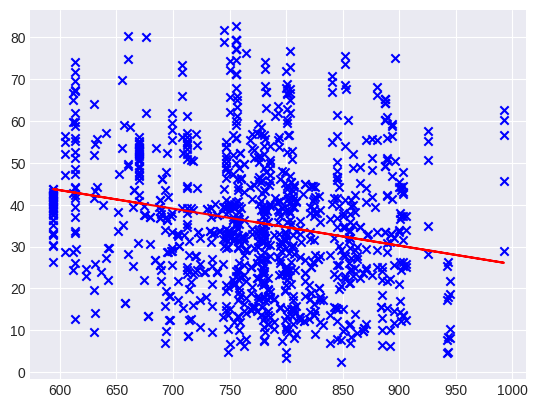


Minimum cost that we obtained = 137.55358099178505 at alpha = 1e-06

alpha = 1e-07
w = 5 , b = 50
w1 = -0.018648158426925583 b1 = 49.993626064502465 cost=138.3690166783593


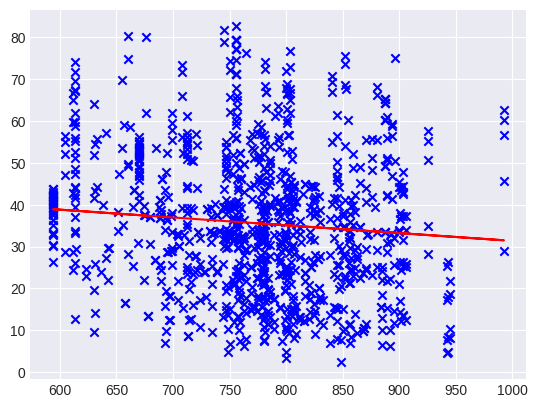


alpha = 1e-07
w = 10 , b = 60
w1 = -0.03142143925809821 b1 = 59.98718662950287 cost=137.5535830595377


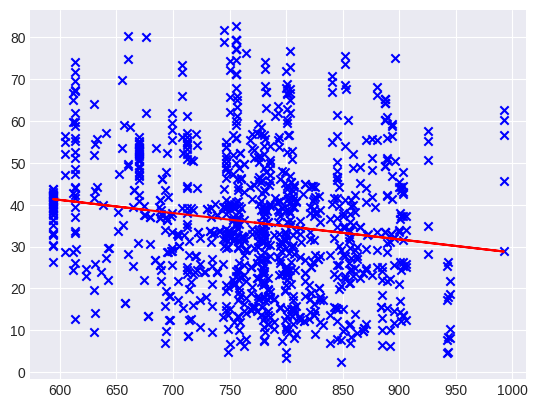


alpha = 1e-07
w = 15 , b = 70
w1 = -0.04419472008927333 b1 = 69.98074719450531 cost=137.81589038814593


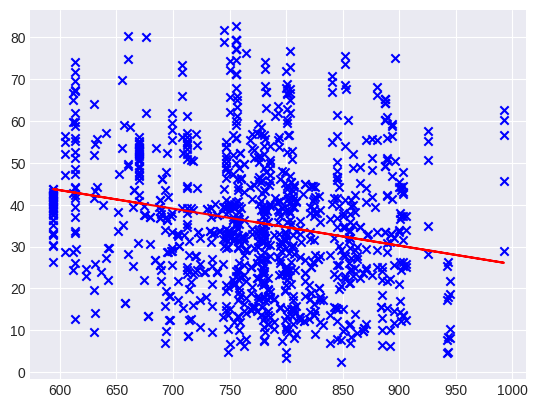


Minimum cost that we obtained = 137.5535830595377 at alpha = 1e-07

alpha = 1e-08
w = 5 , b = 50
w1 = -0.01864805035937621 b1 = 49.9935894748148 cost=138.36902163806377


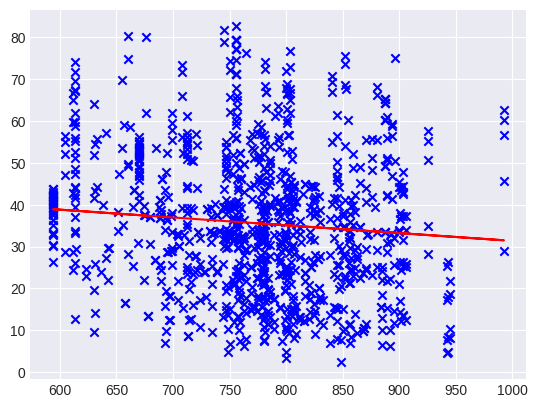


alpha = 1e-08
w = 10 , b = 60
w1 = -0.03142130717889494 b1 = 59.98717915764464 cost=137.55358327086503


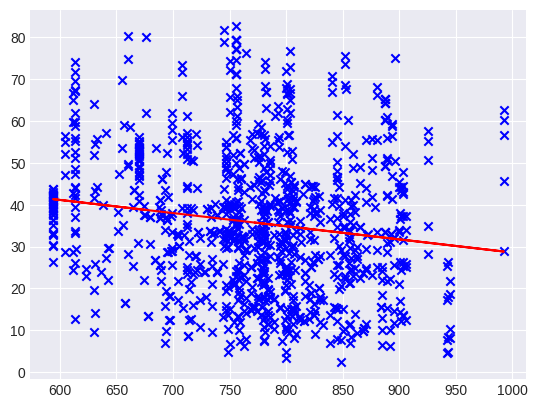


alpha = 1e-08
w = 15 , b = 70
w1 = -0.04419456399841346 b1 = 69.9807688404743 cost=137.81589213369742


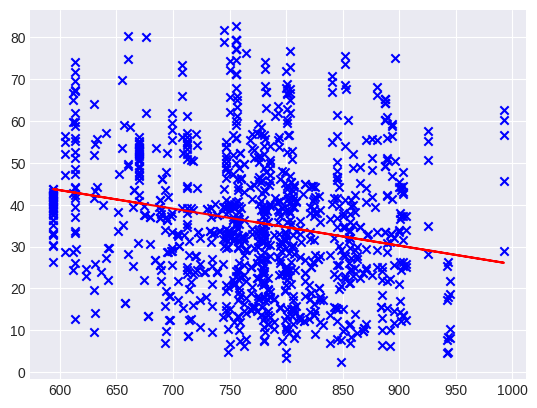


Minimum cost that we obtained = 137.55358327086503 at alpha = 1e-08



In [40]:
# gradient

def compute_gradient(x,y,w,b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_dw += ((w*x[i] + b -y[i])*x[i])/m
        dj_db += (w*x[i] + b -y[i])/m

    return (dj_dw,dj_db)

# gradient descent

def gradient_descent(x,y,w,b,alpha):
    
    for i in range(3000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w_new = w - (dj_dw)*alpha
        b_new = b - (dj_db)*alpha
        w = w_new
        b = b_new
    
    return (w,b)
    

alpha = [0.1,0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001]
x_label = df.columns[feature_num]
x_data = data[:1000,feature_num]
y_label = df.columns[-1]
y_data = data[:1000,-1]

for i in alpha:
    mini = 1e8
    w_mini = 1e8
    b_mini = 1e8
    try:
        w1,b1 = gradient_descent(x_data,y_data,5,50,i)
        print(f"alpha = {i}")
        print("w = 5 , b = 50")
        c = compute_cost(x_data,y_data,w1,b1)
        if c < mini :
            mini = c
            w_mini = w1
            b_mini = b1
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        Y = w1*x_data + b1
        plt.plot(x_data,Y, c='r', label='Gradient Descent for x_data and Y')
        plt.scatter(x_data,y_data, marker='x', c='b',label='Actual Values')
        plt.show()
        print()

        w1,b1 = gradient_descent(x_data,y_data,10,60,i)
        print(f"alpha = {i}")
        print("w = 10 , b = 60")
        c = compute_cost(x_data,y_data,w1,b1)
        if c < mini :
            mini = c
            w_mini = w1
            b_mini = b1
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        Y = w1*x_data + b1
        plt.plot(x_data,Y, c='r', label='Gradient Descent for x_data and Y')
        plt.scatter(x_data,y_data, marker='x', c='b',label='Actual Values')
        plt.show()
        print()

        w1,b1 = gradient_descent(x_data,y_data,15,70,i)
        print(f"alpha = {i}")
        print("w = 15 , b = 70")
        c = compute_cost(x_data,y_data,w1,b1)
        if c < mini :
            mini = c
            w_mini = w1
            b_mini = b1
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        Y = w1*x_data + b1
        plt.plot(x_data,Y, c='r', label='Gradient Descent for x_data and Y')
        plt.scatter(x_data,y_data, marker='x', c='b',label='Actual Values')
        plt.show()
        print()

        print(f"Minimum cost that we obtained = {mini} at alpha = {i}")
        print()
        test_w.append(w_mini)
        test_b.append(b_mini)
    except:
        print(f"alpha = {i} doesn't give linear regression properly")
        print()

**D** : Visualize the weight vector space. 

alpha = 0.1 doesn't give linear regression properly

alpha = 0.01 doesn't give linear regression properly

alpha = 0.001 doesn't give linear regression properly

alpha = 0.0001 doesn't give linear regression properly

alpha = 1e-05 doesn't give linear regression properly



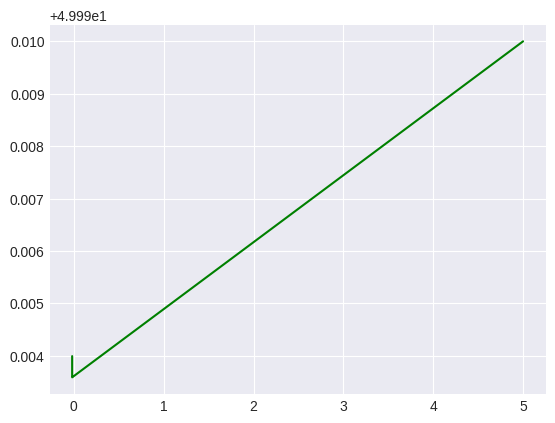

alpha = 1e-06
w = 5 , b = 50
w1 = -0.018648626091942056 b1 = 49.99399195629861 cost=138.36896709427592



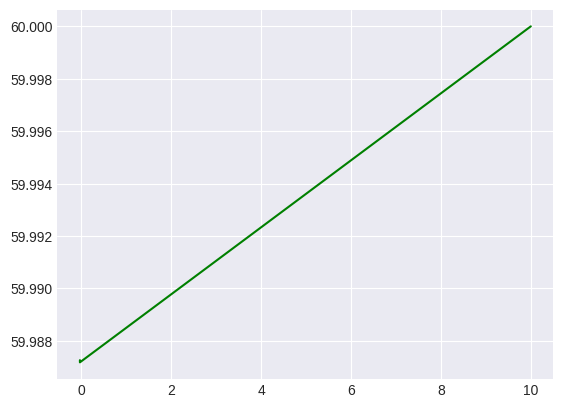

alpha = 1e-06
w = 10 , b = 60
w1 = -0.03142153476021566 b1 = 59.987261348457814 cost=137.55358099178505



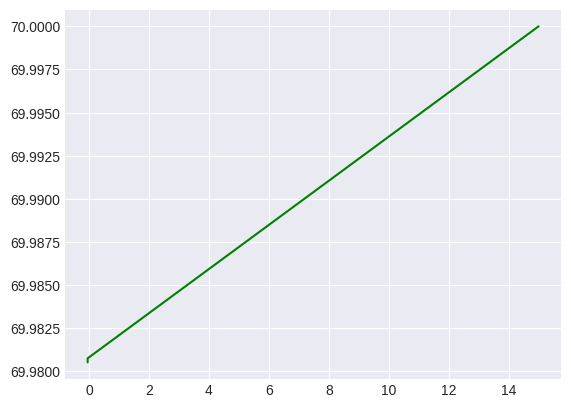

alpha = 1e-06
w = 15 , b = 70
w1 = -0.04419444342848915 b1 = 69.98053074061693 cost=137.81587303541934

Minimum cost that we obtained = 137.55358099178505 at alpha = 1e-06



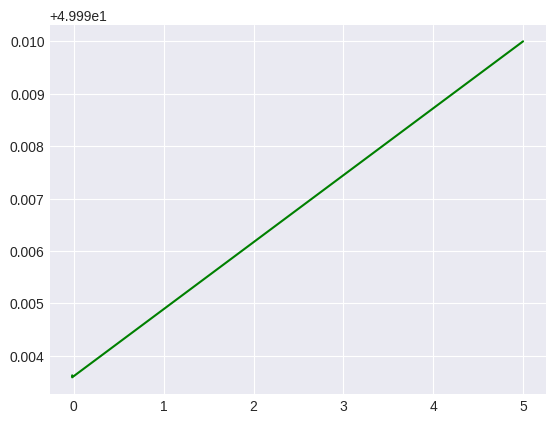

alpha = 1e-07
w = 5 , b = 50
w1 = -0.018648158426925583 b1 = 49.993626064502465 cost=138.3690166783593



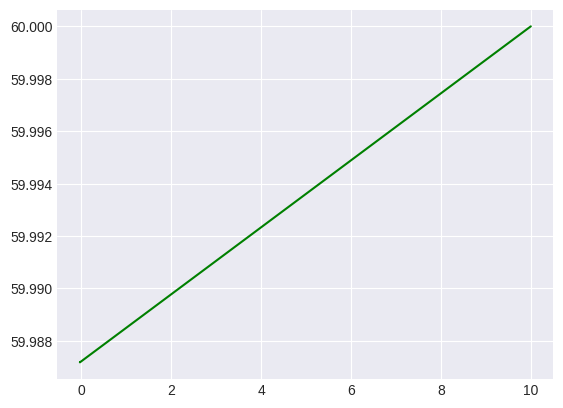

alpha = 1e-07
w = 10 , b = 60
w1 = -0.03142143925809821 b1 = 59.98718662950287 cost=137.5535830595377



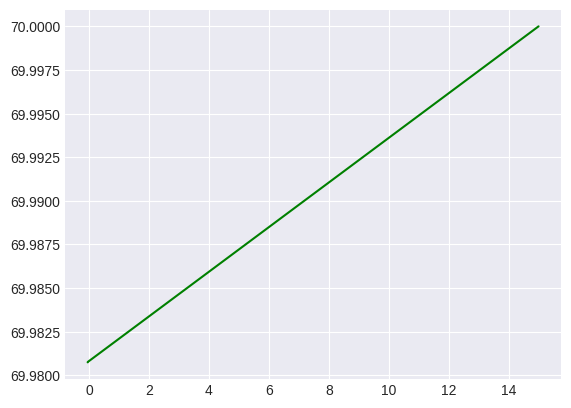

alpha = 1e-07
w = 15 , b = 70
w1 = -0.04419472008927333 b1 = 69.98074719450531 cost=137.81589038814593

Minimum cost that we obtained = 137.5535830595377 at alpha = 1e-07



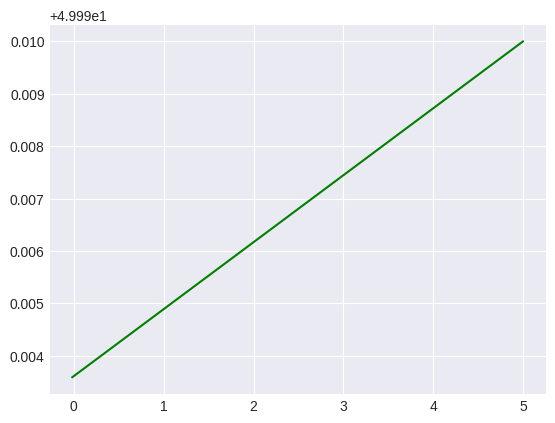

alpha = 1e-08
w = 5 , b = 50
w1 = -0.01864805035937621 b1 = 49.9935894748148 cost=138.36902163806377



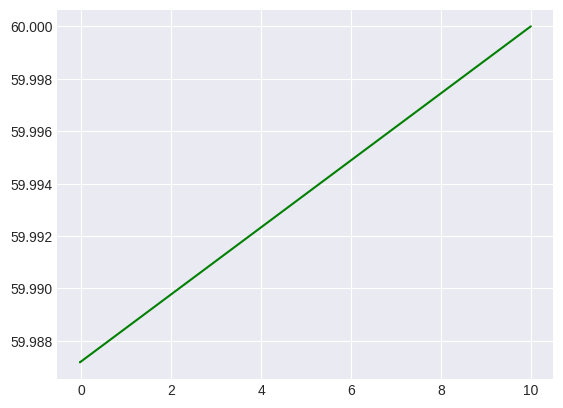

alpha = 1e-08
w = 10 , b = 60
w1 = -0.03142130717889494 b1 = 59.98717915764464 cost=137.55358327086503



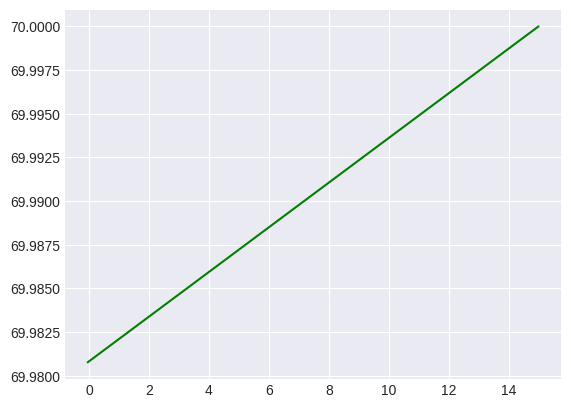

alpha = 1e-08
w = 15 , b = 70
w1 = -0.04419456399841346 b1 = 69.9807688404743 cost=137.81589213369742

Minimum cost that we obtained = 137.55358327086503 at alpha = 1e-08



In [41]:
# gradient descent with graph

def gradient_descent_graph(x,y,w,b,alpha):
    w_history = []
    b_history = []
    w_history.append(w)
    b_history.append(b)
    for i in range(3000):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w_new = w - (dj_dw)*alpha
        b_new = b - (dj_db)*alpha
        w = w_new
        b = b_new
        w_history.append(w)
        b_history.append(b)

    plt.plot(w_history,b_history,c='g',label='weight vector space')
    plt.show()
    
    return (w,b)

for i in alpha:
    mini = 1e8
    try:
        w1,b1 = gradient_descent_graph(x_data,y_data,5,50,i)
        print(f"alpha = {i}")
        print("w = 5 , b = 50")
        c = compute_cost(x_data,y_data,w1,b1)
        if c<mini: mini=c
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        print()

        w1,b1 = gradient_descent_graph(x_data,y_data,10,60,i)
        print(f"alpha = {i}")
        print("w = 10 , b = 60")
        c = compute_cost(x_data,y_data,w1,b1)
        if c<mini: mini=c
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        print()

        w1,b1 = gradient_descent_graph(x_data,y_data,15,70,i)
        print(f"alpha = {i}")
        print("w = 15 , b = 70")
        c = compute_cost(x_data,y_data,w1,b1)
        if c<mini: mini=c
        print(f"w1 = {w1} b1 = {b1} cost={c}")
        print()

        print(f"Minimum cost that we obtained = {mini} at alpha = {i}")
        print()
    except:
        print(f"alpha = {i} doesn't give linear regression properly")
        print()

**F** : Generate 2 sample test cases and predict the output for these test cases.

In [48]:
test_x_data = data[1000::6,feature_num]
test_y_data = data[1000::6,-1]

for i in range(len(test_w)):
    print(f"For w={test_w[i]} and b={test_b[i]},the predicted values are")
    for j in test_x_data:
        f = test_w[i]*j + test_b[i]
        print(f.round(2),end=" ")
    print()
    print(f"The actual values are")
    for j in test_y_data:
        print(j,end=" ")
    print()
    print()


For w=-0.03142153476021566 and b=59.987261348457814,the predicted values are
35.31 37.08 35.16 35.49 34.01 
The actual values are
44.61 18.03 61.24 37.27 37.92 

For w=-0.03142143925809821 and b=59.98718662950287,the predicted values are
35.31 37.08 35.16 35.49 34.01 
The actual values are
44.61 18.03 61.24 37.27 37.92 

For w=-0.03142130717889494 and b=59.98717915764464,the predicted values are
35.31 37.08 35.16 35.49 34.01 
The actual values are
44.61 18.03 61.24 37.27 37.92 



**Verification**

In [43]:
from sklearn.linear_model import LinearRegression

# Assuming 'x_data' and 'y_data' are pandas Series
# Reshape 'x_data' and 'y_data' into 2-dimensional DataFrames with a single column
x = x_data.reshape(-1, 1)
y = y_data.reshape(-1, 1)

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model
reg.fit(x, y)

# Retrieve the coefficients and intercept
w = reg.coef_
b = reg.intercept_

# Compute the cost
cost = compute_cost(x, y, w, b)

# Print the cost and coefficients
print("Cost:", cost)
print("Coefficients:", w)
print("Intercept:", b)


Cost: [[137.51809811]]
Coefficients: [[-0.03469924]]
Intercept: [62.55167167]
